# Chapter 4: Bayesian inference
## The steps of Bayesian inference
To make inferences ('conclusions reached on the basis of evidence and reasoning') about a hypothesis or unknown parameters, Bayesian inference can be used. Bayesian inference is the method of statistical inference, that uses Bayes theorem, to update the probability estimate about the hypothesis or unknown parameters. This process follows three steps:

### Step 1: Choose a prior 
This first step of Bayesian inference requires choosing a so called **prior** (or prior probability distribution/density). The prior represents the initial belief about the hypothesis or the possible values of the parameters before observing the **data y**. Imagine if we want to predict the weather for tomorrow, our prior can consist of the weather's data from the last few days. During this chapter, we will give the priors needed for examples. In [**Chapter 5**](https://bayesian-statistics-for-astrophysics-2024.readthedocs.io/en/latest/lecture_notes/group5/group5.html#) more information about priors; how to choose them and how to use them in an analytical manner will be explained. 

This prior is defined as **f(** $\theta$ **| x)**. Here $\theta$ is the unknown parameter we want to make inferences about and **x** is data given a different hypothesis and parameter values. 

### Step 2: Choose a statistical model
We need to choose a generative model about the observed data given the data x. This model is then defined by y $\sim$ f ( $\theta$ , x). By doing this, we determine the **likelihood: f (y |** $\theta$ **, x)**. In our example of determining the weather for tomorrow, we can see the likelihood like this: If it's cloudy today, the likelihood would quantify how much this piece of evidence supports or contradicts our prior belief about the weather. 

### Step 3: Calculate the posterior density
The final step of Bayesian inference consists of updating the prior of step 1 by using the found likelihood in step 2. By combining the prior and likelihood, we obtain the **posterior density**. The posterior density is defined as: Posterior $\propto$ Prior x Likelihood. Or written in the prior (f ( $\theta$ | x)) and likelihood (f (y | $\theta$ , x )) we determined in respectively **steps 1 & 2**:

f ( $\theta$ | y , x) $\propto$ f ( $\theta$ ) x f (y | $\theta$ , x) 

We can calculate the posterior f ( $\theta$ | y , x) by applying **Bayes theorem**, which we defined in [**Chapter 3**](https://bayesian-statistics-for-astrophysics-2024.readthedocs.io/en/latest/lecture_notes/group3/chapter3.html) as P(A | B) = $\frac{P ( B | A ) P ( A )}{P ( B )}$.

## Visual example
Imagine a doctor wants to diagnose a patient for a rare disease. A research found that 1 out of 1000 people have this disease (so 0.1% of the population). 
The doctor created a test to find out if his patient has the disease. It is determined that the test is 99% accurate if the patient has the disease and gives out a false positive 5% of the times. After testing the patient, the test gives a positive result (this is the data y that we can observe). Now it is up to us to determine the probability of the patient actually having the disease. 

By using Bayesian inference, we can update our prior estimate that the probability of the patient having the disease is 0.1%. We do this by using the given data x about the test to create a likelihood. With this prior and the found likelihood, we can then determine the posterior and posterior probability using Bayes Theorem. See how this is done in the code below. Try to see if you understand the steps we take!

In [33]:
#-------------------------------------------------------------------------------------------------------------------------------------------------
import numpy as np

# Step 1: Prior
Prior_Disease = 0.001 # The probability for the patient having the disease is 0.1%. (P(Disease) = 0.001)
Prior_NoDisease = 1-Prior_Disease # The probability for the patient not having the disease is 99.9%. (P(No Disease) = 0.999)

# Step 2: Model and likelihood
Positive_Disease = 0.99 # The probability that if you test positive, you have the disease is 99%. (P(Positive|Disease) = 0.99)
Positive_NoDisease = 0.05 # The probability that if you test positive, you don't have the disease (false positive) is 5%. (P(Positive|No Disease) = 0.05)
Positive = (Positive_Disease * Prior_Disease) + (Positive_NoDisease * Prior_NoDisease) # The probability of having a positive test.

# Step 3: Posterior probability
# Computing this by using Bayes' theorem : P(Disease|Positive) = (P(Positive|Disease)*P(Disease)) / P(Positive)
Disease_Positive = (Positive_Disease*Prior_Disease)/Positive # The probability that you have the disease if you test positive.

# This gives us the following result:
print("The posterior probability of the patient having the disease if they test positive is", (np.round(Disease_Positive,4))*100,
      "%, while initially the chances of the patient having the disease was", (np.round(Prior_Disease,3))*100,"%.")
#--------------------------------------------------------------------------------------------------------------------------------------------------

The posterior probability of the patient having the disease if they test positive is 1.94 %, while initially the chances of the patient having the disease was 0.1 %.


This is ofcourse a very small probability. If this feels weird, just remember that the chances of having the disease are small and that the false positivity of the test impacts the probability significantly as well. Also check for yourself if you can spot all the variables we introduced in the explanation above and if you understand why each of the steps are taken. If you feel comfortable with this example, then it is time to get astrophysical! 

## Computation of confidence intervals using a grid search in comination with an updated posterior
Computing confidence intervals using a grid search is a method particularly useful when analytic solutions are unavailable. By evaluating the parameter space, calculating posterior probabilities for every point, and deriving credible intervals we get a confidence interval given the data and prior knowledge such that P[Θ ∈ I | X] = 1−α where alpha is our confidence level. In this manner  it is an analogue to a frequentist confidence interval.

By first creating a fine grid of plausible values for our parameters and defining a posterior, following bayesian inference, we can compute the value of the posterior in each point. Meaning that every combination of n parameters is used to calculate the posterior giving a hypercube filled with **m_1 \cdot m_2 \cdot ... \cdot m_n** points. (for ** m_i** the total number of chosen grid values).
 

To identify the confidence interval we have two main methods. The equal tail methods consists of looking at the interval [θ(α/2),θ(1−α/2)], which determines the region where all points lay such the probability for a point to lay in this interval is 1- alpha. This reflects the true probability the value of our parameter lies in that interval. However this brings some ambiguity into play. Imagine a simple gaussian distribution. we can construct a alpa =0.5 interval on the left side going from -inf to the mean or an interval on the right side. we can also have the mean in the middle of the interval and symmetrically go to both side. To solve this ambivalence we try to minimize the length of the interval. Or let the interval be determined by equalling the excluded area on both tail-ends. rtest

updating posteriors ...



## Complete example
To illustrate bayesian inference using grid searches to determine confidence intervals and updating said posterior we will look at the Intensity I_e of an galaxy at several radii. It has three parameter of which two are independent. r_e is the scale length for which the r=0 intensity has dropped to half its value,  n is the Sersic index controlling the curvature of the profile. b_n is determined by solving the eq. $$\gamma (2n,bn) = 0.5 \Gamma(2n)$$ or for n > 0.5 the approximation: $$ b(n) = 2n − \frac{1}{3} + \frac{4}{405n}  + \frac{46}{25515n^2}$$
giving the full profile the following form:
$$ \rho = \rho_0 \exp{ \left[-b_n \left( \frac{r}{r_e} \right)^{\frac{1}{n}}- 1 \right]} $$






source: https://arxiv.org/pdf/astro-ph/9911078 and https://ned.ipac.caltech.edu/level5/March05/Graham/Graham2.html






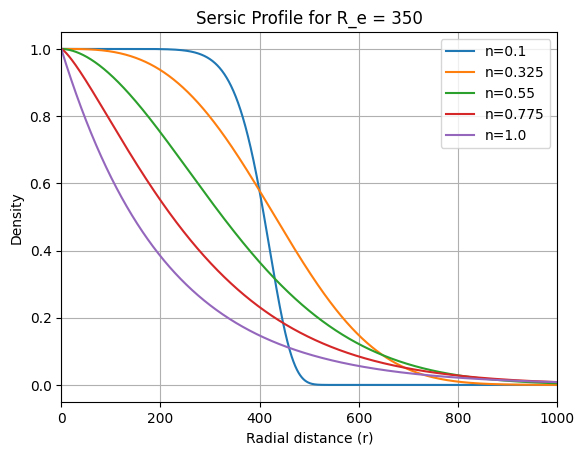

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from tqdm.notebook import tqdm
import numpy as np
import scipy.optimize as opt
import scipy.special as sp
import matplotlib.pyplot as plt

# -------------------- Step 1: Simulate SNR density distribution --------------------
np.random.seed(1212237)

def sersic_profile(r, r_e, n):
    """Compute the Sérsic profile"""
    b_n = 2 * n - 1/3 +4/(405*n) + 46/(25515*n**2) # Approximation for b_n 
    rho = np.exp(-b_n * ((r / r_e)**(1/n) - 1))
    return rho / np.max(rho) 
   
   
R_max  = 1e3
r_range = np.linspace(0,R_max,10000)

# True parameters
n = np.linspace(0.1,1, 5)
r_e = 350

plt.figure()
plt.title("Sersic Profile for R_e = 350")
for i in range(len(n)):
    plt.plot(r_range, sersic_profile(r_range, r_e, n[i]), label=f"n={n[i]}")

plt.xlim(0,R_max)
plt.grid()
plt.xlabel("Radial distance (r)")
plt.ylabel("Density")
plt.legend()

plt.show()


We will sample n points from this distribution (with n = 0.35, as an example, normall we have profiles ~1 or ~4), picking a relatively unprecise simulation first. We'll do so to show how we can improve this later by updating the posterior with a new data set. The simulated data will be given a gaussian scatter around the true value to simulate observational uncertainties. In the plot below we can see the form of this sersic profile and the simulated set. 



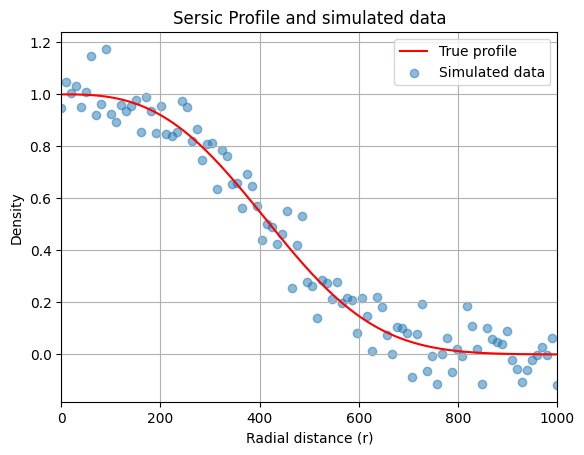

In [27]:
def sim_data(r,r_e,n, fractional_uncertainty):
	y_true = sersic_profile(r,r_e,n)
	#y_unc_true = np.abs(y_true)*
	y_sample = np.random.normal(y_true, fractional_uncertainty, size=len(r)) 
	return y_sample, fractional_uncertainty#, y_unc_true


R_max  = 1e3 
r_range_model = np.linspace(0,R_max,1000)

# True parameters
true_n = 0.35
true_r_e = 350

#simulating data
unc = 0.08
r_range_sim = np.linspace(0,R_max,100)

sim_r, sim_r_uncertainty = sim_data(r_range_sim, true_r_e , true_n, unc)
# 
plt.figure()
plt.title("Sersic Profile and simulated data")
plt.plot(r_range_model, sersic_profile(r_range_model, true_r_e, true_n), c="red", label="True profile")
plt.scatter(r_range_sim, sim_r, alpha=0.5, label="Simulated data")
plt.xlim(0,R_max)
plt.grid()
plt.xlabel("Radial distance (r)")
plt.ylabel("Density")
plt.legend()
plt.show()

After simulating the data we can start the bayesian inference. We start with choosing a prior. For now we will assume a flat prior which is around the true n and true r_e value. From looking at different simulated sersic profiles such bounds could in practise be estimated. The statistical model will be a guassian likelihood. Since we will work with calculations with small values we prefer the log-likelihood to reduce numerical problems. 

Calculating the posterior then comes down to calculating the product of the prior and likelihood (or the exponent containing the sum of the log-prior and the log-likelihood).  

In [28]:
# -------------------- Step 2: Define Prior and Likelihood --------------------
def flat_prior(n, r_e ):
    if 0.1<= n <= 0.6 and 200 <= r_e <= 500:  # Example bounds
        return 1
    return 0 

def log_likelihood(r, observed, sigma, r_e, n,):
    model_density = sersic_profile(r, r_e, n)
    return (-np.sum(0.5 * ((observed - model_density) / sigma) ** 2 + np.log(sigma * np.sqrt(2 * np.pi))))

def posterior(n_space, r_e_space, r_range, sim_r, sim_r_uncertainty, prior):
    log_posterior_grid = np.full((len(n_space),len(r_e_space)), -np.inf)
    
    # Loop over all combinations of n and r_e, filling in the grid with values of the posterior
    for i in tqdm(range(len(n_space))):
        for j in range(len(r_e_space)):
            prior_val = prior(n_space[i],r_e_space[j] )
            if prior_val == 0:
                continue
            else:
                # Compute likelihood for this position (using the simulated data)
                # Compute the posterior for this position,
                # i represents the n parameter (axis = 0), and j represents the r_e parameter (axis=1)
                log_likelihood_value = log_likelihood(r_range, sim_r, sim_r_uncertainty,r_e_space[j], n_space[i] )
                log_posterior_grid[i, j] = log_likelihood_value + np.log(prior_val)    
                
    posterior = np.exp(log_posterior_grid - np.max(log_posterior_grid))
    
    return  posterior


Using a grid forces us to calculate this posterior for every point in the grid, as explained in ... . We will first compute a coarse grid to determine the range of values without spending excess time on computing fine grids in unwanted regions.

In [29]:
# Create a "coarse" 2D grid of r_e and n,
#simulation time = 10 seconds
n_space = np.linspace(0.2, 0.6, 250)
r_e_space = np.linspace(200, 500, 250)
posterior_grid = posterior(n_space, r_e_space, r_range_sim, sim_r, sim_r_uncertainty, flat_prior)
posterior_grid /= np.sum(posterior_grid)  # Normalizing the grid 


  0%|          | 0/250 [00:00<?, ?it/s]

In [30]:
#  best-fit parameters found by using argmax and indexing
max_idx = np.unravel_index(np.argmax(posterior_grid), posterior_grid.shape)
best_fit_n = n_space[max_idx[0]]
best_fit_r_e = r_e_space[max_idx[1]]

print(f"Best-fit n: {best_fit_n:.3f}")
print(f"Best-fit r_e: {best_fit_r_e:.3f}")  

Best-fit n: 0.351
Best-fit r_e: 351.807


To get a feeling of how the posterior distribution of both parameters looks like we will plot the following:
- A 2D posterior density
- The margenalised posterior for r_e
- The margenalised posterior for n

This gives us a feeling for how the distribution looks like, enabeling us to determine a finer grid.

Margenalising over one of the parameters is done by summing (for continious function an intergral is taken) over all other parameters, collapsing the posterior into a single-parameter function. $$ P(r_e) = \Sigma_{n} P(r_e,n) $$

We then plot all of these, along with the best fit value and the true values.


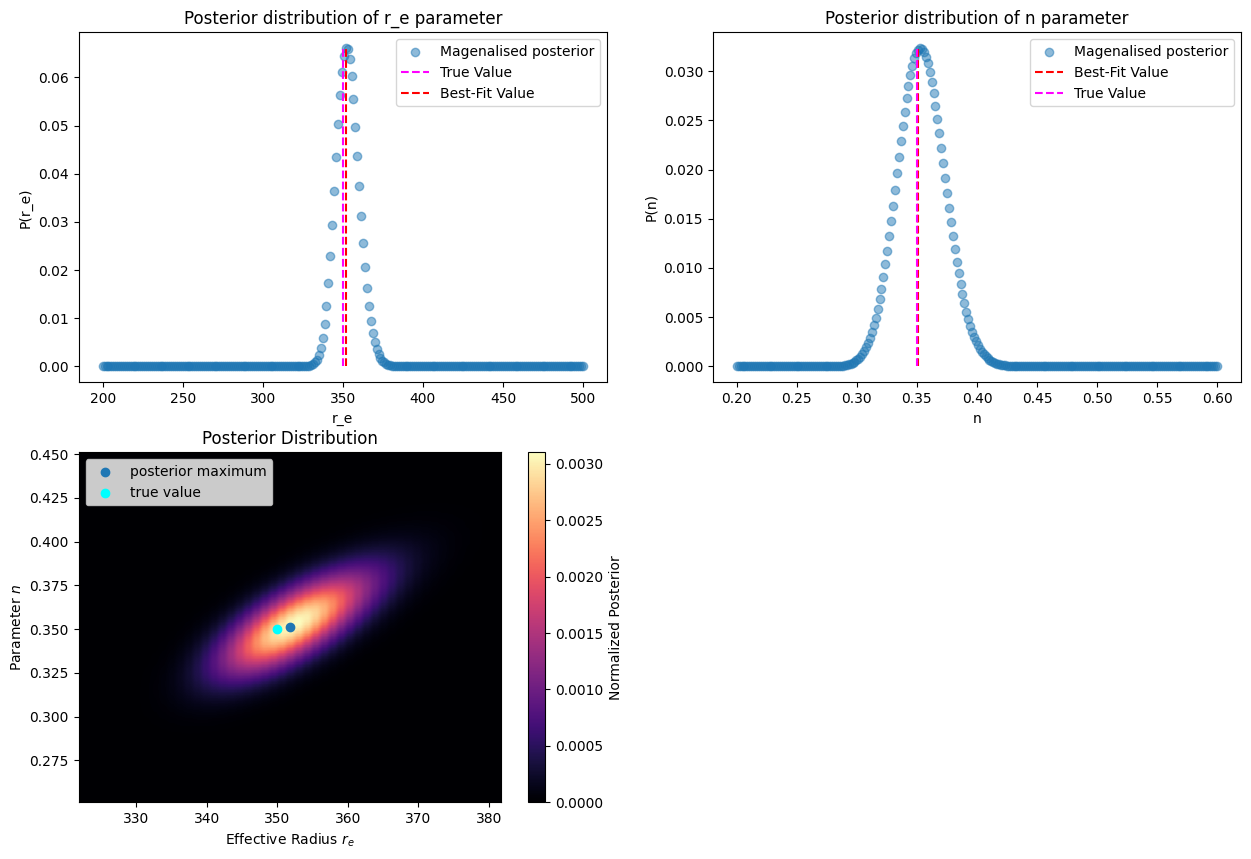

In [31]:
P_r_e = np.sum(posterior_grid, axis=0)
P_n = np.sum(posterior_grid, axis=1)

#normalisation
P_r_e  /= np.sum(P_r_e )
P_n /= np.sum(P_n)


plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Posterior distribution of r_e parameter")
plt.scatter(r_e_space, P_r_e, label="Magenalised posterior", alpha=0.5)
plt.vlines(true_r_e, ymin=np.min(P_r_e),ymax=np.max(P_r_e), color="magenta", linestyles="--", label="True Value")
plt.vlines(x= best_fit_r_e, ymin=np.min(P_r_e),ymax=np.max(P_r_e), color="r", linestyles="--", label="Best-Fit Value")
plt.xlabel("r_e")
plt.ylabel("P(r_e)")
plt.legend()

plt.subplot(2,2,2)
plt.title("Posterior distribution of n parameter")
plt.scatter(n_space,P_n,  label="Magenalised posterior", alpha=0.5)
plt.vlines(x= best_fit_n,ymin=np.min(P_n),ymax=np.max(P_n), color="r", linestyles="--", label="Best-Fit Value")
plt.vlines(true_n, ymin=np.min(P_n),ymax=np.max(P_n), color="magenta", linestyles="--", label="True Value")
plt.xlabel("n")
plt.ylabel("P(n)")
plt.legend()


plt.subplot(2,2,3)
plt.imshow(posterior_grid, extent=[r_e_space.min(), r_e_space.max(), n_space.min(), n_space.max()], origin='lower', aspect='auto', cmap='magma')
plt.colorbar(label="Normalized Posterior",cmap='magma' )
plt.scatter(best_fit_r_e, best_fit_n, label="posterior maximum")
plt.scatter(true_r_e,true_n, label="true value",c="cyan")

plt.title("Posterior Distribution")
plt.xlabel("Effective Radius $r_e$")
plt.ylabel("Parameter $n$")
plt.ylim(best_fit_n-0.1, best_fit_n+0.1)
plt.xlim(best_fit_r_e-30, best_fit_r_e+30)
plt.legend(loc="upper left")
plt.show()


We can see that both the margenalised posteriors have gausian-like curves relatively close to the true parameters. We can now create a smaller and finer grid to correctly determine the confidence intervals of both parameters, which we til this point have neglected. We center the grid around the best fit value and add many more points to the grid. Then in the same manner we plot the (margenalized) posterior. This will in principle have the same shape as above, but with many more points so that the intervals between points is smaller than the wanted precision.

In [32]:

#defining a finer grid. Not this well take >1min of computing time 
n_space = np.linspace(best_fit_n-0.15, best_fit_n+0.15, 2000)
r_e_space = np.linspace(best_fit_r_e-50, best_fit_r_e+50, 2000)
posterior_grid = posterior(n_space, r_e_space, r_range_sim, sim_r, sim_r_uncertainty, flat_prior)
P_r_e = np.sum(posterior_grid, axis=0)
P_n = np.sum(posterior_grid, axis=1)
P_r_e  /= np.sum(P_r_e )
P_n /= np.sum(P_n)


  0%|          | 0/2000 [00:00<?, ?it/s]

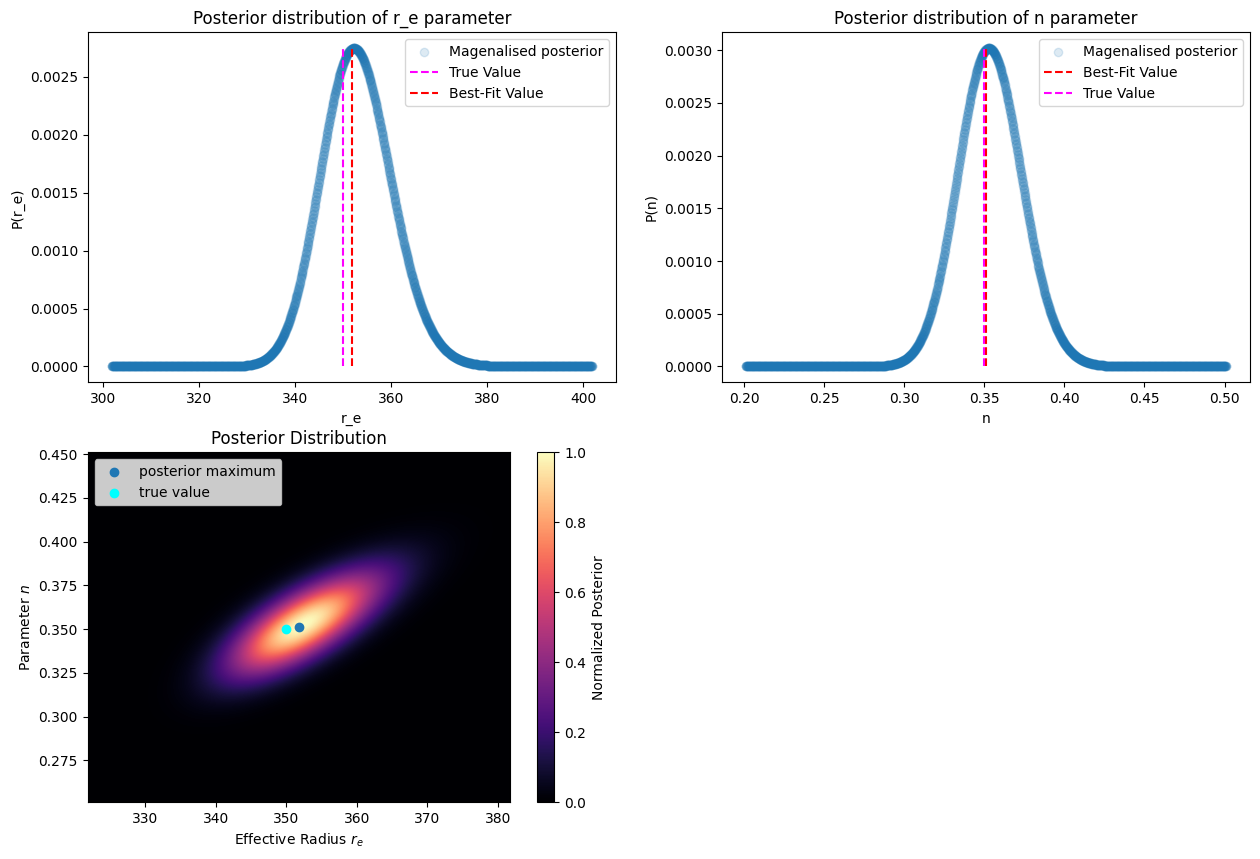

In [33]:

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Posterior distribution of r_e parameter")
plt.scatter(r_e_space, P_r_e, label="Magenalised posterior", alpha=0.15)
plt.vlines(true_r_e, ymin=np.min(P_r_e),ymax=np.max(P_r_e), color="magenta", linestyles="--", label="True Value")
plt.vlines(x= best_fit_r_e, ymin=np.min(P_r_e),ymax=np.max(P_r_e), color="r", linestyles="--", label="Best-Fit Value")
plt.xlabel("r_e")
plt.ylabel("P(r_e)")
plt.legend()

plt.subplot(2,2,2)
plt.title("Posterior distribution of n parameter")
plt.scatter(n_space,P_n,  label="Magenalised posterior", alpha=0.15)
plt.vlines(x= best_fit_n,ymin=np.min(P_n),ymax=np.max(P_n), color="r", linestyles="--", label="Best-Fit Value")
plt.vlines(true_n, ymin=np.min(P_n),ymax=np.max(P_n), color="magenta", linestyles="--", label="True Value")
plt.xlabel("n")
plt.ylabel("P(n)")
plt.legend()


plt.subplot(2,2,3)
plt.imshow(posterior_grid, extent=[r_e_space.min(), r_e_space.max(), n_space.min(), n_space.max()], origin='lower', aspect='auto', cmap='magma')
plt.colorbar(label="Normalized Posterior",cmap='magma' )
plt.scatter(best_fit_r_e, best_fit_n, label="posterior maximum")
plt.scatter(true_r_e,true_n, label="true value",c="cyan")

plt.title("Posterior Distribution")
plt.xlabel("Effective Radius $r_e$")
plt.ylabel("Parameter $n$")
plt.ylim(best_fit_n-0.1, best_fit_n+0.1)
plt.xlim(best_fit_r_e-30, best_fit_r_e+30)
plt.legend(loc="upper left")
plt.show()

In [34]:
#  best-fit parameters
max_idx = np.unravel_index(np.argmax(posterior_grid), posterior_grid.shape)
best_fit_n = n_space[max_idx[0]]
best_fit_r_e = r_e_space[max_idx[1]]
print(f"Best-fit n: {best_fit_n:.3f}")
print(f"Best-fit r_e: {best_fit_r_e:.3f}")  


Best-fit n: 0.352
Best-fit r_e: 352.282


## confidence intervals

Up until now, everything is similar as previous example. We now also want to say something about the confidence interval around the best fit value. To do so we will compute the cumulative distribution of the posterior. This is the probability for a random variable X to take on a value less than or equal to a certain value x. The CDF can then be used to find the percentile forming the interval's bounds. These percentiles are combined with the sample statistic, enabling to define the interval in the parameter space. 

The first function will do so by looking for exactly these bounderies. It will work for most applications. In the case we have a probability distribution that has two maxima or is centered around a hard bound (lets say the number of particles which can never be 0 but a distribution that goes into the negatives), we can use the second function. It works similarly as the first function but will calculate the probability to lie within two bounds, {i,j}, of the parameter space using a CDF. When this matches the desired confidence interval these bounds are saved. We then search for all ambigious bounderies also having such valid interval and minimize it to obtain the one with minimum width. This will provide the wanted interval. 

Since we will be working with a one bell curve distribution which does not have strict bounds, we will show of both work and give the same result and then omit the second approach for the rest of the example. 


In [35]:
def compute_equal_tailed_interval(parameter_space, posterior, alpha):
    cdf = np.cumsum(posterior)
    lower_bound = parameter_space[np.searchsorted(cdf, alpha / 2)]
    upper_bound = parameter_space[np.searchsorted(cdf, 1 - alpha / 2)]
    return lower_bound, upper_bound

def find_minimal_interval(parameter_space, posterior, alpha):
    # Normalize posterior to ensure it sums to 1
    posterior = posterior / np.sum(posterior)

    # Initialize variables
    min_width = np.inf
    best_interval = None
    target_prob =  1-alpha
    
    # Sliding window
    for i in tqdm(range(len(parameter_space)), desc="Parameter space"):  # Start of the window
        cumulative_prob = 0  # Reset cumulative probability for each new starting point
        
        for j in range(i, len(parameter_space)):  # End of the window
            # Expand the window by adding the probability at j
            cumulative_prob += posterior[j]

            # Check if the window meets or exceeds the target probability
            if cumulative_prob >= target_prob:
                # Calculate the width of the current window
                width = parameter_space[j] - parameter_space[i]

                # If the current window's width is smaller, update the best interval
                if width < min_width:
                    min_width = width
                    best_interval = (round(parameter_space[i], 3), round(parameter_space[j], 3))

                # No need to continue further as we want to minimize the width
                break  # Move to the next starting point (i)

    return best_interval

In [36]:
P_r_e = np.sum(posterior_grid, axis=0)
P_n = np.sum(posterior_grid, axis=1)

# Normalize the marginalized distributions
n_mag = P_n /  np.sum(P_n)
r_e_mag = P_r_e /  np.sum(P_r_e)

# Compute confidence intervals (# 68% confidence)
alpha = 0.16
n_lower, n_upper = compute_equal_tailed_interval(n_space, n_mag, alpha)
r_e_lower, r_e_upper = compute_equal_tailed_interval(r_e_space, r_e_mag, alpha)
# Find minimal-width intervals for n and r_e
n_min_interval = find_minimal_interval(n_space, n_mag, alpha)
r_e_min_interval = find_minimal_interval(r_e_space, r_e_mag, alpha)


Parameter space:   0%|          | 0/2000 [00:00<?, ?it/s]

Parameter space:   0%|          | 0/2000 [00:00<?, ?it/s]

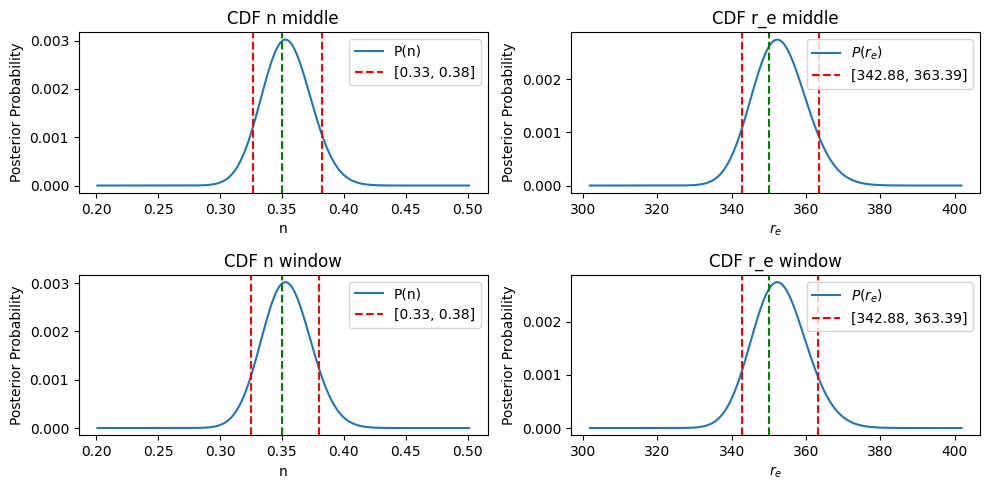

In [37]:
plt.figure(figsize=(10, 5))

# Marginalized n
plt.subplot(2, 2, 1)
plt.plot(n_space, n_mag, label='P(n)')
plt.title("CDF n middle")
plt.axvline(n_lower, color='r', linestyle='--', label=f"[{n_lower:.2f}, {n_upper:.2f}]")
plt.axvline(n_upper, color='r', linestyle='--')
plt.axvline(true_n, color='green', linestyle='--')

plt.xlabel("n")
plt.ylabel("Posterior Probability")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(n_space, n_mag, label='P(n)')
plt.title("CDF n window")
plt.axvline(n_min_interval[0], color='r', linestyle='--', label=f"[{n_lower:.2f}, {n_upper:.2f}]")
plt.axvline(n_min_interval[1], color='r', linestyle='--')
plt.axvline(true_n, color='green', linestyle='--')

plt.xlabel("n")
plt.ylabel("Posterior Probability")
plt.legend()

# Marginalized r_e
plt.subplot(2, 2, 2)
plt.title("CDF r_e middle")
plt.plot(r_e_space, r_e_mag, label=r'$P(r_e)$')
plt.axvline(r_e_lower, color='r', linestyle='--', label=f"[{r_e_lower:.2f}, {r_e_upper:.2f}]")
plt.axvline(r_e_upper, color='r', linestyle='--')
plt.axvline(true_r_e, color='green', linestyle='--')

plt.xlabel(r"$r_e$")
plt.ylabel("Posterior Probability")
plt.legend()

plt.subplot(2, 2, 4)
plt.title("CDF r_e window")
plt.plot(r_e_space, r_e_mag, label=r'$P(r_e)$')
plt.axvline(r_e_min_interval[0], color='r', linestyle='--', label=f"[{r_e_lower:.2f}, {r_e_upper:.2f}]")
plt.axvline(r_e_min_interval[1], color='r', linestyle='--')
plt.axvline(true_r_e, color='green', linestyle='--')

plt.xlabel(r"$r_e$")
plt.ylabel("Posterior Probability")
plt.legend()

plt.tight_layout()
plt.show()  

In [38]:
from IPython.display import display, Math, Markdown #module to properly show intervals
#could print confidence intervals
# print(f"confidence interval for n: [{n_lower:.3f} - {n_upper:.3f}]")
# print(f"confidence interval for r_e: [{r_e_lower:.3f} - {r_e_upper:.3f}]")
# print("\n")
# print(f"Minimal-width interval for n confidence: [{n_min_interval[0]} - {n_min_interval[1]}] ")
# print(f"Minimal-width interval for r_e confidence:[{r_e_min_interval[0]} - {r_e_min_interval[1]}]")

#But it is more insightfull to view the upper and lower bounds with respect to the best fit value
display( Markdown(r"Best fit value for n with confidence interval:"), Math(f"{best_fit_n:.2f}^{{+{-(best_fit_n-n_upper):.2f}}}_{{-{best_fit_n - n_lower:.2f}}}"))

display( Markdown(r"Best fit value for r_e with confidence interval:"), Math(f" {best_fit_r_e:.0f}^{{+{-(best_fit_r_e-r_e_upper):.0f}}}_{{-{best_fit_r_e - r_e_lower:.0f}}}"))


Best fit value for n with confidence interval:

<IPython.core.display.Math object>

Best fit value for r_e with confidence interval:

<IPython.core.display.Math object>

In above plots we see the calculated intervals, which are very similar for both approaches. We can also see the true values lies within the 1 \sigma interval for both parameters. In principle one is done. We have to the best of our ability calculated a best-fit value with confidence intervals for the provided data. 

However to show how updating of the posterior works we go one step further. Imagine the case where you do a second study on the luminoscity of the galaxy and obtain 200 instead of 100 data points with an even smaller uncertainty (0.05 to 0.08) from a newer telescope. We could argue the previous data is still pretty usefull. To see how we can use this "old" data we simulate the newer data and just like above calculate it's posterior grid, find the confidence interval and its most probable value. However we calculate two posteriors this time. One where we omit the previous data and one where we "update" it with this data. 

Before running the code in the cells below, think of what you expect of the new data set and wheter the old data can have a significant effect/ constrains the parameter space noticeably. 


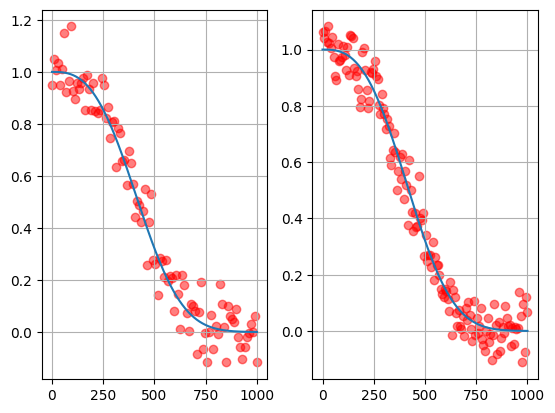

In [48]:
unc_better = 0.06
r_range_better = np.linspace(0,R_max,150)

sim_r_2, sim_r_uncertainty_2 = sim_data(r_range_better, true_r_e, true_n, unc_better)

plt.figure()
plt.subplot(1,2,1)
plt.plot(r_range_model, sersic_profile(r_range_model, true_r_e, true_n))
plt.scatter(r_range_sim, sim_r, alpha=0.5, c="red")

plt.grid()

plt.subplot(1,2,2)
plt.plot(r_range_model, sersic_profile(r_range_model, true_r_e, true_n))
plt.scatter(r_range_better, sim_r_2, alpha=0.5, c="red")

plt.grid()
plt.show()


In [49]:
#calculating the posterior for the second data set (again computation time ~1.5min)
posterior_grid_2 = posterior(n_space, r_e_space, r_range_better, sim_r_2, sim_r_uncertainty_2, flat_prior)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [50]:

#normalizing the posterior
posterior_grid_2 /= np.sum(posterior_grid_2) 

#Posterior update with the original posterior grid and normalisation of it.
posterior_grid_updated = posterior_grid_2 * posterior_grid
posterior_grid_updated /= np.sum(posterior_grid_updated)

#best-fit parameters
max_idx = np.unravel_index(np.argmax(posterior_grid_2), posterior_grid_2.shape)
best_fit_n_2 = n_space[max_idx[0]]
best_fit_r_e_2 = r_e_space[max_idx[1]]

print(f"Best-fit n: {best_fit_n_2:.3f}")
print(f"Best-fit r_e: {best_fit_r_e_2:.3f}") 

max_idx = np.unravel_index(np.argmax(posterior_grid_updated), posterior_grid_updated.shape)
best_fit_n_updated = n_space[max_idx[0]]
best_fit_r_e_updated = r_e_space[max_idx[1]]
print('\n')
print(f"Best-fit n with update: {best_fit_n_updated:.3f}")
print(f"Best-fit r_e with update: {best_fit_r_e_updated:.3f}") 

Best-fit n: 0.348
Best-fit r_e: 345.429


Best-fit n with update: 0.349
Best-fit r_e with update: 347.230


We can already see the best fit value for the updated posterior is more accurate than the one without update. Let's see how the confidence intervals are influenced. To do so we again will plot the marganalized posterior and the density plot as above.

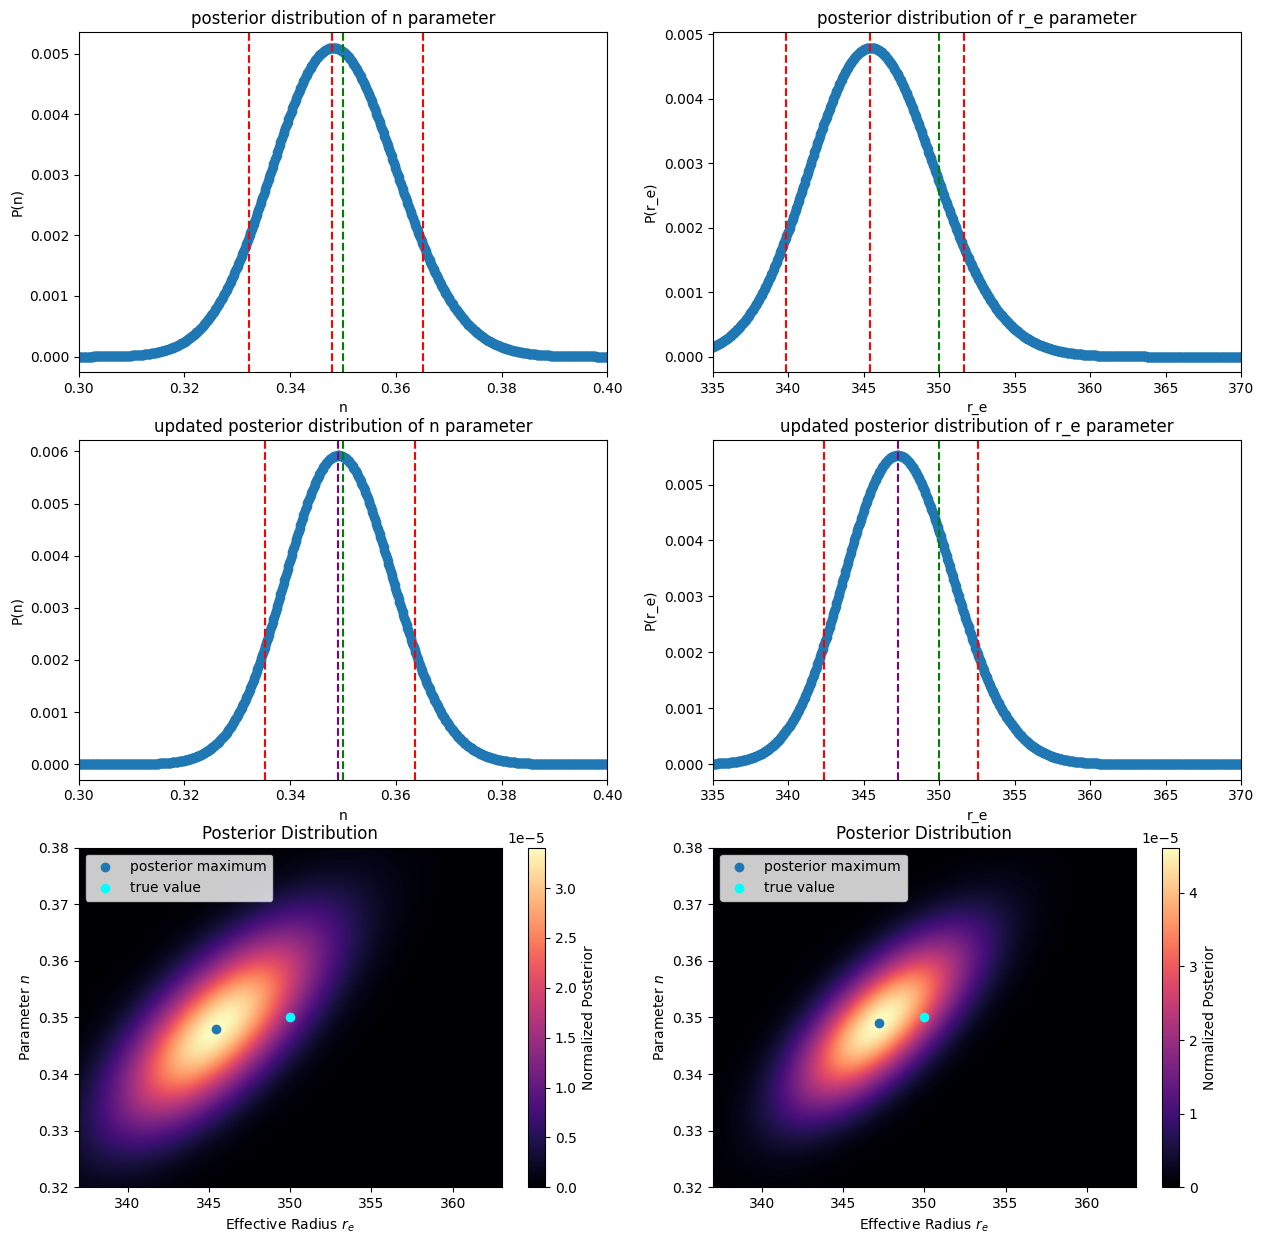

In [51]:
P_r_e_2 = np.sum(posterior_grid_2, axis=0)
r_e_mag_2 = P_r_e_2 / np.sum(P_r_e_2)
P_n_2 = np.sum(posterior_grid_2, axis=1)
n_mag_2 = P_n_2 / np.sum(P_n_2)

P_r_e_updated = np.sum(posterior_grid_updated, axis=0)
r_e_mag_updated = P_r_e_updated / np.sum(P_r_e_updated)
P_n_updated = np.sum(posterior_grid_updated, axis=1)
n_mag_updated = P_n_updated / np.sum(P_n_updated)


alpha = 0.16
# Compute confidence intervals 
n_lower_2, n_upper_2 = compute_equal_tailed_interval(n_space, n_mag_2, alpha)
r_e_lower_2, r_e_upper_2 = compute_equal_tailed_interval(r_e_space, r_e_mag_2, alpha)

n_lower_updated, n_upper_updated = compute_equal_tailed_interval(n_space, n_mag_updated, alpha)
r_e_lower_updated, r_e_upper_updated = compute_equal_tailed_interval(r_e_space, r_e_mag_updated, alpha)


plt.figure(figsize=(15,15))
plt.subplot(3,2,2)
plt.title("posterior distribution of r_e parameter")
plt.scatter(r_e_space, P_r_e_2)
plt.axvline(r_e_lower_2, color='r', linestyle='--')
plt.axvline(r_e_upper_2, color='r', linestyle='--')
plt.axvline(best_fit_r_e_2, color="r", linestyle="--")
plt.axvline(true_r_e, color='green', linestyle='--')
plt.xlabel("r_e")
plt.ylabel("P(r_e)")
plt.xlim(335, 370)


plt.subplot(3,2,1)
plt.title("posterior distribution of n parameter")
plt.scatter(n_space,P_n_2)
plt.axvline(n_lower_2, color='r', linestyle='--')
plt.axvline(n_upper_2, color='r', linestyle='--')
plt.axvline(best_fit_n_2, color="r", linestyle="--")

plt.axvline(true_n, color='green', linestyle='--')

plt.xlabel("n")
plt.ylabel("P(n)")
plt.xlim(0.3, 0.4)

plt.subplot(3,2,4)
plt.title("updated posterior distribution of r_e parameter")
plt.scatter(r_e_space, P_r_e_updated)
plt.axvline(r_e_lower_updated, color='r', linestyle='--')
plt.axvline(r_e_upper_updated, color='r', linestyle='--')
plt.axvline(x= best_fit_r_e_updated, color="purple", linestyle="--")
plt.axvline(true_r_e, color='green', linestyle='--')
plt.xlabel("r_e")
plt.ylabel("P(r_e)")
plt.xlim(335, 370)


plt.subplot(3,2,3)
plt.title("updated posterior distribution of n parameter")
plt.scatter(n_space,P_n_updated)
plt.axvline(n_lower_updated, color='r', linestyle='--')
plt.axvline(n_upper_updated, color='r', linestyle='--')
plt.axvline(x= best_fit_n_updated, color="purple", linestyle="--")
plt.axvline(true_n, color='green', linestyle='--')

plt.xlabel("n")
plt.ylabel("P(n)")
plt.xlim(0.3, 0.4)


plt.subplot(3,2,5)
plt.imshow(posterior_grid_2, extent=[r_e_space.min(), r_e_space.max(), n_space.min(), n_space.max()], origin='lower', aspect='auto', cmap='magma')
plt.colorbar(label="Normalized Posterior",cmap='magma' )
plt.scatter(best_fit_r_e_2, best_fit_n_2, label="posterior maximum")
plt.scatter(true_r_e,true_n, label="true value", c="cyan")

plt.title("Posterior Distribution")
plt.xlabel("Effective Radius $r_e$")
plt.ylabel("Parameter $n$")
plt.ylim(true_n-0.03, true_n+0.03)
plt.xlim(true_r_e-13, true_r_e+13)
plt.legend(loc="upper left")

plt.subplot(3,2,6)
plt.imshow(posterior_grid_updated, extent=[r_e_space.min(), r_e_space.max(), n_space.min(), n_space.max()], origin='lower', aspect='auto', cmap='magma')
plt.colorbar(label="Normalized Posterior",cmap='magma' )
plt.scatter(best_fit_r_e_updated, best_fit_n_updated, label="posterior maximum")
plt.scatter(true_r_e,true_n, label="true value", c="cyan")

plt.title("Posterior Distribution")
plt.xlabel("Effective Radius $r_e$")
plt.ylabel("Parameter $n$")
plt.ylim(true_n-0.03, true_n+0.03)
plt.xlim(true_r_e-13, true_r_e+13)
plt.legend(loc="upper left")



plt.show()

In [54]:
# print(f"confidence interval for n: [{n_lower_2:.3f}, {n_upper_2:.3f}]")
# print(f"confidence interval for r_e: [{r_e_lower_2:.3f}, {r_e_upper_2:.3f}]")
# print("\n")
# print(f"confidence interval for n (with update): [{n_lower_updated:.3f}, {n_upper_updated:.3f}]")
# print(f"confidence interval for r_e (with update): [{r_e_lower_updated:.3f}, {r_e_upper_updated:.3f}]")
display( Markdown(r"Best fit value for n with confidence interval for posterior 1:"), Math(f"{best_fit_n:.2f}^{{+{-(best_fit_n-n_upper):.2f}}}_{{-{best_fit_n - n_lower:.2f}}}"))

display( Markdown(r"Best fit value for r_e with confidence interval for posterior 1:"), Math(f" {best_fit_r_e:.0f}^{{+{-(best_fit_r_e-r_e_upper):.0f}}}_{{-{best_fit_r_e - r_e_lower:.0f}}}"))

print("\n")

display( Markdown(r"Best fit value for n with confidence interval for posterior 2:"), Math(f"{best_fit_n_2:.2f}^{{+{-(best_fit_n_2-n_upper_2):.2f}}}_{{-{best_fit_n_2 - n_lower_2:.2f}}}"))

display( Markdown(r"Best fit value for r_e with confidence interval for posterior 2:"), Math(f" {best_fit_r_e_2:.0f}^{{+{-(best_fit_r_e_2-r_e_upper_2):.0f}}}_{{-{best_fit_r_e_2 - r_e_lower_2:.0f}}}"))

print("\n")

display( Markdown(r"Best fit value for n with confidence interval with updated posterior:"), Math(f"{best_fit_n_updated:.2f}^{{+{-(best_fit_n_updated-n_upper_updated):.2f}}}_{{-{best_fit_n_updated - n_lower_updated:.2f}}}"))

display( Markdown(r"Best fit value for r_e with confidence interval with updated posterior:"), Math(f" {best_fit_r_e_updated:.0f}^{{+{-(best_fit_r_e_updated-r_e_upper_updated):.0f}}}_{{-{best_fit_r_e_updated - r_e_lower_updated:.0f}}}"))


Best fit value for n with confidence interval for posterior 1:

<IPython.core.display.Math object>

Best fit value for r_e with confidence interval for posterior 1:

<IPython.core.display.Math object>

Best fit value for n with confidence interval for posterior 2:

<IPython.core.display.Math object>

Best fit value for r_e with confidence interval for posterior 2:

<IPython.core.display.Math object>

Best fit value for n with confidence interval with updated posterior:

<IPython.core.display.Math object>

Best fit value for r_e with confidence interval with updated posterior:

<IPython.core.display.Math object>

We can see that the updated case both has a more accurate value (closer to the true value) and has more precision (smaller confidence interval). For this scenario we can thus conclude that the update made sense. If for example your newer data set was way less uncertain or had an order of magnitude more points, the effects would have been less. Updating it in this case might even make it worse compared to only using the "better" data. 

# conclusions

In conclusion we see that using bayesian inference is an appropiate method to obtain parameters from a multi-variable model. Using a grid to do so is computationally intens but does work. In the next chapter ... we will discuss a more efficient method. Obtaining the confidence intervals from the CDF is in turn a reliable approach to get a grip on the precision acquired from the data. The two methods shown work in principle both but have their own niche place, which is dependant on the type of data one has. We see the more data points with a smaller inherent uncertainty results in better final results and that updating your posterior with previous data could further help out your precision and accuracy. 


